In [1]:
from math import sqrt
import cv2
from skimage.feature import blob_dog, blob_log, blob_dog
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
# Load the color image
image = cv2.imread("butterfly.jpeg",cv2.IMREAD_GRAYSCALE)

In [3]:
# Perform blob detection using LoG, DoG, and DoH
blobs_log = blob_log(image, max_sigma=30, num_sigma=10, threshold=0.05)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)  # Adjust radius for LoG

In [4]:
blobs_dog = blob_dog(image, max_sigma=30, threshold=0.05)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)  # Adjust radius for DoG


In [5]:
# Prepare visualization
blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'lime']
titles = ['Laplacian of Gaussian (LoG)', 'Difference of Gaussian (DoG)']


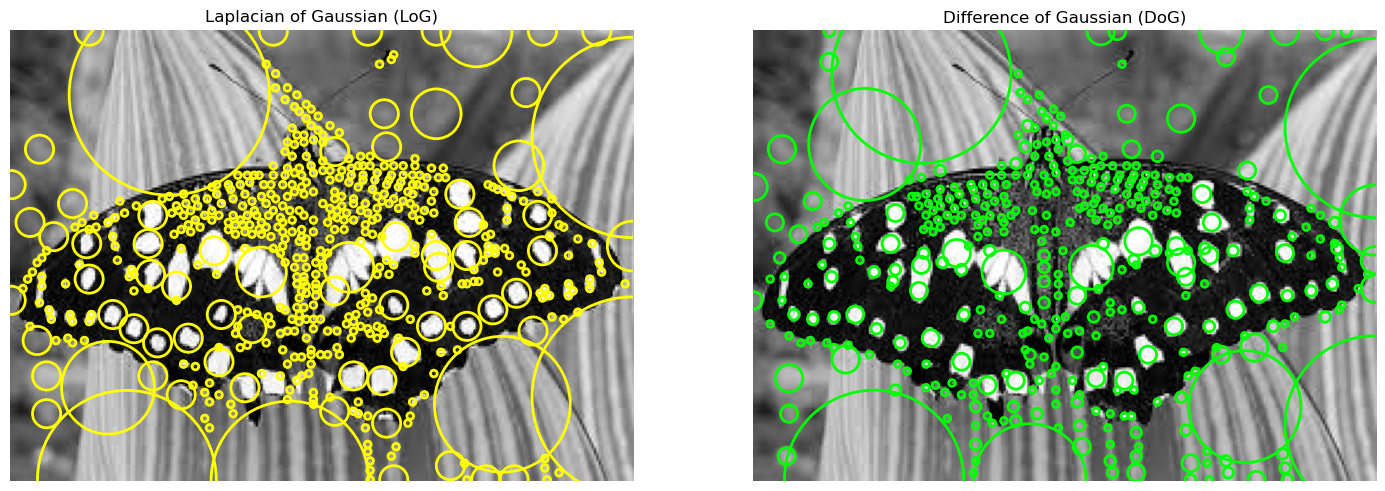

In [6]:
# Create subplots for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(zip(blobs_list, colors, titles)):
    ax[idx].set_title(title)
    ax[idx].imshow(image,cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [7]:
params = cv2.SimpleBlobDetector_Params()

# Filter by area
params.filterByArea = True
params.minArea = 10 # Adjust to set minimum blob size
params.maxArea = 2000  # Adjust to set maximum blob size

In [8]:
# Filter by circularity
params.filterByCircularity = True
params.minCircularity = 0.5  # Adjust based on circularity of blobs (0 to 1)


In [9]:
# Filter by convexity
params.filterByConvexity = True
params.minConvexity = 0.7  # Adjust to filter convex blobs


In [10]:
# Filter by inertia (elongated shapes)
params.filterByInertia = True
params.minInertiaRatio = 0.3

In [11]:
# Create a blob detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
 # Convert to BGR for colored output
output_image = cv2.drawKeypoints(image, keypoints, None, (0, 0, 255),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


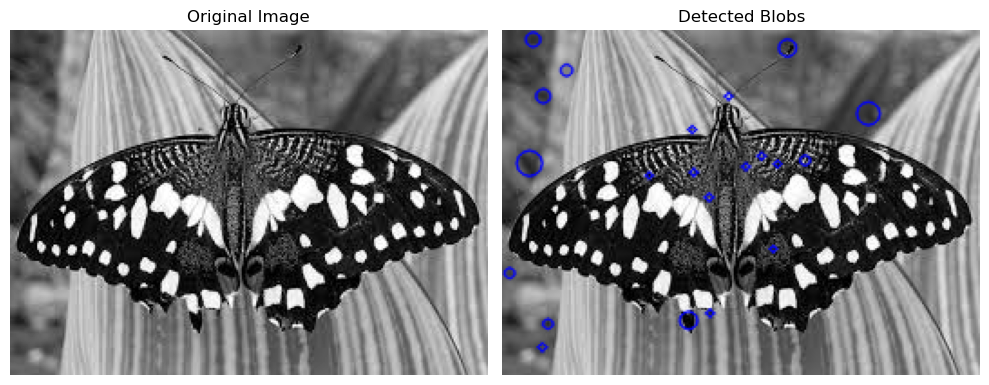

Number of blobs detected: 21
Blob 1: X=102.57, Y=160.35, Diameter=9.76
Blob 2: X=149.37, Y=120.85, Diameter=3.73
Blob 3: X=134.21, Y=75.50, Diameter=4.00
Blob 4: X=80.85, Y=80.37, Diameter=3.73
Blob 5: X=105.45, Y=78.60, Diameter=4.30
Blob 6: X=151.74, Y=74.00, Diameter=4.24
Blob 7: X=166.92, Y=72.06, Diameter=5.45
Blob 8: X=201.89, Y=46.17, Diameter=12.75
Blob 9: X=16.66, Y=5.39, Diameter=7.99
Blob 10: X=24.95, Y=162.32, Diameter=5.43
Blob 11: X=114.45, Y=156.38, Diameter=4.24
Blob 12: X=113.95, Y=92.38, Diameter=4.51
Blob 13: X=14.68, Y=73.68, Diameter=14.12
Blob 14: X=142.90, Y=69.67, Diameter=4.26
Blob 15: X=22.30, Y=36.59, Diameter=7.84
Blob 16: X=21.84, Y=175.13, Diameter=4.79
Blob 17: X=3.76, Y=134.28, Diameter=5.49
Blob 18: X=157.16, Y=9.99, Diameter=9.61
Blob 19: X=124.71, Y=36.59, Diameter=4.01
Blob 20: X=35.19, Y=22.31, Diameter=6.33
Blob 21: X=104.63, Y=54.97, Diameter=4.43


In [12]:
# Show the original and output images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

# Image with Detected Blobs
plt.subplot(1, 2, 2)
plt.title("Detected Blobs")
plt.imshow(output_image)
plt.axis("off")

plt.tight_layout()
plt.show()

# Print blob information
print(f"Number of blobs detected: {len(keypoints)}")
for i, keypoint in enumerate(keypoints, 1):
    print(f"Blob {i}: X={keypoint.pt[0]:.2f}, Y={keypoint.pt[1]:.2f}, Diameter={keypoint.size:.2f}")

In [13]:
# Load the color image
image_color = cv2.imread("stoneblob.jpg")  # Replace with your image path